In [28]:
import requests,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Functions for getting SensorTower data. 
# Store_Intelligence
# Rate Limit: 6 requests per second. 
# Requests should be made to the following base URL, followed by the specific path to the API you want to use.
# Latest Updated Date: 2021.03.02
# Author: Chen

# Compact Download / Revenue Estimates ???


# Download / Revenue Estimates for applications (If run error please try https://api.sensortower-china.com:443)

# Input: 
# os: Operating System (use "ios", "android",or "unified")
# country: Checking CountryCodes_CategoryIDs to select country (use"WW" for worldwide, "US"  for United States)  
# date_granularity: use "daily", "weekly","monthly", or"quarterly",defaults to "daily"
# start_date:(yyyy-mm-dd) 
# end_date: (yyyy-mm-dd)  
# app_ids: (defaults to None) 
# publisher_ids: (defaults to None) 
# Do not give both app_ids and publisher_ids at same time. 

# Output: A dataframe which containz: 
 
# {
#   "sales_report_estimates_key": {
#     "ios": {
#       "aid": "App ID",
#       "cc": "Country Code",
#       "d": "Date",
#       "iu": "iPhone Downloads",
#       "ir": "iPhone Revenue",
#       "au": "iPad Downloads",
#       "ar": "iPad Revenue"
#     },
#     "android": {
#       "aid": "App ID",
#       "c": "Country Code",
#       "d": "Date",
#       "u": "Android Downloads",
#       "r": "Android Revenue"
#     },
#     "unified": {
#       "app_id": "App ID",
#       "country": "Country Code",
#       "date": "Date",
#       "android_units": "Android Downloads",
#       "android_revenue": "Android Revenue",
#       "ipad_units": "iPad Downloads",
#       "ipad_revenue": "iPad Revenue",
#       "iphone_units": "iPhone Downloads",
#       "iphone_revenue": "iPhone Revenue"
#     }
#   }
# }
# If used publisher_ids, all applications made by this publisher will return. 

# Example: 
# get_data_apps = requests_Download_RevenueEstimates('ios', 'US', 'daily', '2020-11-01', '2020-11-04', '1531465966')
# get_data_publishers = requests_Download_RevenueEstimates('ios', 'US', 'daily', '2020-11-01', '2020-11-04', publisher_ids = '1191495496') 

def requests_Download_RevenueEstimates(os, country, date_granularity, start_date, end_date, app_ids = None, publisher_ids = None):
    if app_ids == None and publisher_ids == None:
        return(print('Error, at least one app ID, or one publisher ID is required.'))
        
    elif publisher_ids == None:
        aux_DRE = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/sales_report_estimates?app_ids='+app_ids+
                               '&countries='+country+
                               '&date_granularity='+date_granularity+
                               '&start_date='+
                               start_date+'&end_date='+
                               end_date+'&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    else:
        aux_DRE = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/sales_report_estimates?publisher_ids='+publisher_ids+
                               '&countries='+country+
                               '&date_granularity='+date_granularity+
                               '&start_date='+
                               start_date+'&end_date='+
                               end_date+'&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_DRE = pd.DataFrame(aux_DRE.json())
    print(aux_DRE.status_code)
    return(df_DRE)


# Top Apps(If run error please try https://api.sensortower-china.com:443) for one day, week, month, quarter. 给出指定日期后，会寻找该日期所在的日，周，月，季度，
# Input:
# os: Operating System (use "ios", "android",or "unified")
# comparision_attribute: use "absolute", "delta", or "transformed_delta"
# time_range: use "day","week", "month", or "quarter"
# measure: use "units" or "revenue"
# device_type: use "iphone", "ipad", or "total" for `ios`, leave blank for `android`, use "total" for `unified`
# category: Checking CountryCodes_CategoryIDs to select category.(use 6014 for game applications)
# date: Date.YYYY-MM-DD format.Auto-changes to the beginning of time_range.Ex: Mondays for weeks, 1st of the month, 1st day of the quarter, 1st day of the year.
# country: Checking CountryCodes_CategoryIDs to select country (use"WW" for worldwide, "US"  for United States)
# limit: Limit how many apps per call. (Default: 25, Max: 2000)

# Output: A dataframe which contains informations of top Apps. 
# The variable custom_tags contains informations about each application. 

# Example_ios_uni: 
# https://api.sensortower-china.com/v1/ios/sales_report_estimates_comparison_attributes?comparison_attribute=absolute&time_range=week&measure=units&device_type=total&category=6014&date=2021-02-08&country=US&limit=25&auth_token=r7cTTJq5nBSqxMU_WmJo
# get_week_AppRanking1 = requests_ios_uni_TopApps_periodic('ios', 'absolute', 'week','units', 'total', '6014', '2021-02-08','US','25') # 2021-02-08---2021-02-14
# get_week_AppRanking2 = requests_ios_uni_TopApps_periodic('ios', 'absolute', 'week','units', 'total', '6014', '2021-02-07','US','25') # 2021-02-01---2021-02-7
# get_week_AppRanking3 = requests_ios_uni_TopApps_periodic('ios', 'absolute', 'week','units', 'total', '6014', '2021-02-03','US','25') # 2021-02-01---2021-02-7


# Example_Android: 
# https://api.sensortower-china.com/v1/android/sales_report_estimates_comparison_attributes?comparison_attribute=absolute&time_range=week&measure=units&category=game&date=2021-02-08&country=US&limit=25&auth_token=r7cTTJq5nBSqxMU_WmJo
# get_week_ranking4 = requests_Android_TopApps_periodic('android', 'absolute', 'week','units', 'game', '2021-02-08','US','25')

def requests_ios_uni_TopApps_periodic(os,comparision_attribute, time_range, measure, device_type, category, date, country, limit):  
    aux_TopApps = requests.get('https://api.sensortower-china.com:443/v1/'
                               +os+'/sales_report_estimates_comparison_attributes?comparison_attribute='+comparision_attribute+
                               '&time_range='+time_range+
                               '&measure='+measure+
                               '&device_type='+device_type+
                               '&category='+category+
                               '&date='+date+
                               '&country='+country+
                               '&limit='+limit+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_TopApps = pd.DataFrame(aux_TopApps.json())
    print(aux_TopApps.status_code) # Get response messages
    return(df_TopApps)


# def requests_TopApps_customized(os,comparision_attribute, measure, device_type, category, date, end_date, country, limit):  
#     aux_TopApps = requests.get('https://api.sensortower-china.com:443/v1/'
#                                +os+'/sales_report_estimates_comparison_attributes?comparison_attribute='+comparision_attribute+
#                                '&measure='+measure+
#                                '&device_type='+device_type+
#                                '&category='+category+
#                                '&date='+date+
#                                '&end_date='+end_date+
#                                '&country='+country+
#                                '&limit='+limit+
#                                '&auth_token=r7cTTJq5nBSqxMU_WmJo'
#                                )
#     df_TopApps = pd.DataFrame(aux_TopApps.json())
#     print(aux_TopApps.status_code) # Get response messages
#     return(df_TopApps)    


def requests_Android_TopApps_periodic(os,comparision_attribute, time_range, measure, category, date, country, limit):  
    aux_TopApps = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/sales_report_estimates_comparison_attributes?comparison_attribute='+comparision_attribute+
                               '&time_range='+time_range+
                               '&measure='+measure+
                               '&category='+category+
                               '&date='+date+
                               '&country='+country+
                               '&limit='+limit+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_TopApps = pd.DataFrame(aux_TopApps.json())
    print(aux_TopApps.status_code) # Get response messages
    return(df_TopApps)


# Top Publishers(If run error please try https://api.sensortower-china.com:443) for one day, week, month, quarter. 给出指定日期后，会寻找该日期所在的日，周，月，季度，
# Input:
# os: Operating System (use "ios", "android",or "unified")
# comparision_attribute: use "absolute", "delta", or "transformed_delta"
# time_range: use "day","week", "month", or "quarter"
# measure: use "units" or "revenue"
# device_type: use "iphone", "ipad", or "total" for `ios`, leave blank for `android` and `unified`
# category: Checking CountryCodes_CategoryIDs to select category.(use 6014 for game applications)
# date: Date.YYYY-MM-DD format.Auto-changes to the beginning of time_range.Ex: Mondays for weeks, 1st of the month, 1st day of the quarter, 1st day of the year.
# country: Checking CountryCodes_CategoryIDs to select country (use"WW" for worldwide, "US"  for United States)
# limit: Limit how many apps per call. (Default: 25, Max: 2000)

# Output: A dataframe which contains informations of top Publishers. 
# The variable apps contains all informations of applications made by each publisher. 

# Example_ios: 
# https://api.sensortower-china.com/v1/ios/top_and_trending/publishers?comparison_attribute=absolute&time_range=week&measure=units&device_type=total&category=6014&date=2021-02-08&country=US&limit=25&auth_token=r7cTTJq5nBSqxMU_WmJo
# get_week_PubRanking1_ios = requests_ios_TopPublishers_periodic('ios', 'absolute', 'week','units', 'total', '6014', '2021-02-08','US','25')

# Example_Android_uni: 
# https://api.sensortower-china.com/v1/android/top_and_trending/publishers?comparison_attribute=absolute&time_range=week&measure=units&category=6014&date=2021-02-08&country=US&limit=25&auth_token=r7cTTJq5nBSqxMU_WmJo
# get_week_PubRanking1_android = requests_Android_uni_TopPublishers_periodic('android', 'absolute', 'week','units', 'game', '2021-02-08','US','25')

def requests_ios_TopPublishers_periodic(os,comparision_attribute, time_range, measure, device_type, category, date, country, limit):  
    aux_TopPublishers = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/top_and_trending/publishers?comparison_attribute='+comparision_attribute+
                               '&time_range='+time_range+
                               '&measure='+measure+
                               '&device_type='+device_type+
                               '&category='+category+
                               '&date='+date+
                               '&country='+country+
                               '&limit='+limit+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_TopPublishers = pd.DataFrame(aux_TopPublishers.json())
    print(aux_TopPublishers.status_code) # Get response messages
    return(df_TopPublishers)


def requests_Android_uni_TopPublishers_periodic(os,comparision_attribute, time_range, measure, category, date, country, limit):  
    aux_TopPublishers = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/top_and_trending/publishers?comparison_attribute='+comparision_attribute+
                               '&time_range='+time_range+
                               '&measure='+measure+
                               '&category='+category+
                               '&date='+date+
                               '&country='+country+
                               '&limit='+limit+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_TopPublishers = pd.DataFrame(aux_TopPublishers.json())
    print(aux_TopPublishers.status_code) # Get response messages
    return(df_TopPublishers)



# Store Summary: Information for all ios or android.
# Input:
# Output: 


def requests_Store_Summary(os, category, country, granularity, start_date, end_date):  
    aux_SS = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/store_summary?categories='+category+
                               '&countries='+country+
                               '&date_granularity='+granularity+
                               '&start_date='+start_date+
                               '&end_date='+end_date+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_SS = pd.DataFrame(aux_SS.json())
    print(aux_SS.status_code) # Get response messages
    return(df_SS)

# Game Breakdown: Information for all ios or android.(games specific)
# Input:
# Output: 

def requests_Games_Breakdown(os, category, country, granularity, start_date, end_date):  
    aux_GB = requests.get('https://api.sensortower-china.com/v1/'
                               +os+'/games_breakdown?categories='+category+
                               '&countries='+country+
                               '&date_granularity='+granularity+
                               '&start_date='+start_date+
                               '&end_date='+end_date+
                               '&auth_token=r7cTTJq5nBSqxMU_WmJo'
                               )
    df_GB = pd.DataFrame(aux_GB.json())
    print(aux_GB.status_code) # Get response messages
    return(df_GB)


# MAE, MAPE, MSE, RMSE 


# MAPE(Mean absolute percentage error.) 
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

# MSE(Mean squared error.)
def MSE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square(y_true - y_pred))


# RMSE(root_mean_square_error.)
def RMSE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# MAE(Mean absolute error)
def MAE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)))



def compare(y_true, y_ST_pred, y_AA_pred):
    aux_comparision = pd.DataFrame(
        {   "A-Name": ["ST", "AA"],
            "MAPE": [MAPE(y_true, y_ST_pred), MAPE(y_true, y_AA_pred)],
            "MSE": [MSE(y_true, y_ST_pred), MSE(y_true, y_AA_pred)],
            "RMSE": [RMSE(y_true, y_ST_pred), RMSE(y_true, y_AA_pred)],
            "MAE": [MAE(y_true, y_ST_pred), MAE(y_true, y_AA_pred)]
   })
    return(aux_comparision)





200


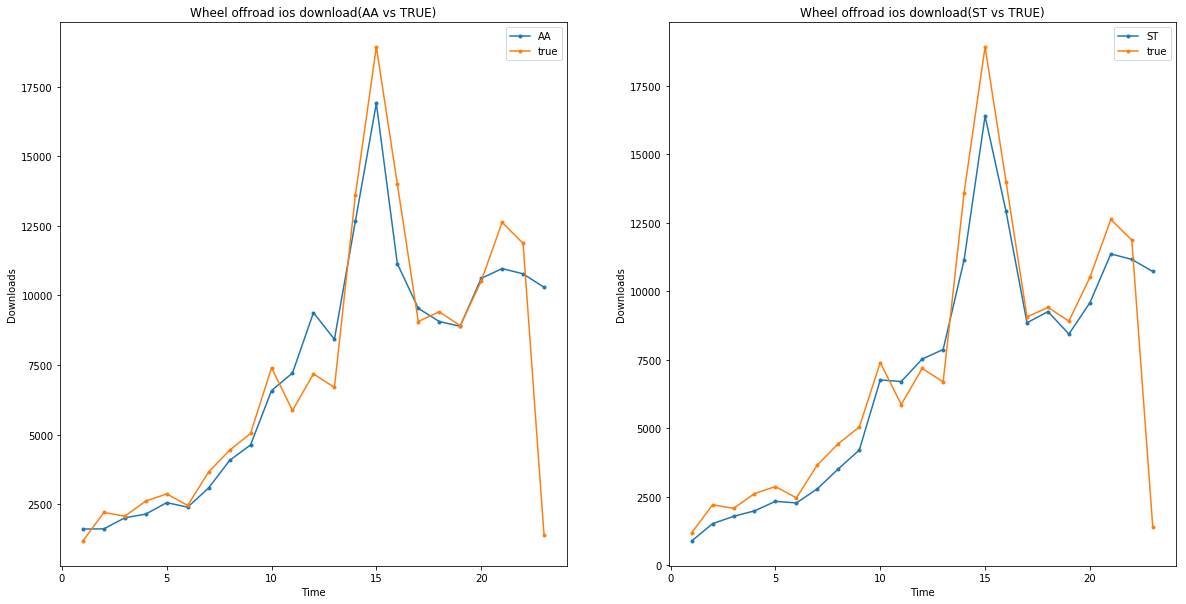

  A-Name          MAE      MAPE           MSE         RMSE
0     ST  1191.739130  0.423327  4.798065e+06  2190.448634
1     AA  1209.695652  0.405561  4.724320e+06  2173.550061


In [15]:
wor_st = requests_Download_RevenueEstimates('ios', 'US', 'daily', '2021-2-7', '2021-3-1', '1550052723')
wor_st['u'] = wor_st['au'] + wor_st['iu']

WOR_true = pd.read_excel('wheelaoffroad-ios.xlsx')
wor_st['true'] = WOR_true['下载量']

WOR_AA = pd.read_excel('iOS_WOR_AA.xlsx')
wor_st['AA'] = WOR_AA['Download']
wor_st['count'] = [i for i in range(1, len(wor_st['u']) + 1)]

# subplot(numRows, numCols, plotNum)
# 
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(wor_st['count'], wor_st['AA'], '.-', label='AA')
plt.plot(wor_st['count'], wor_st['true'], '.-', label='true')
plt.title('Wheel offroad ios download(AA vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()

plt.subplot(122)
plt.plot(wor_st['count'], wor_st['u'], '.-', label='ST')
plt.plot(wor_st['count'], wor_st['true'], '.-', label='true')
plt.title('Wheel offroad ios download(ST vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()
plt.show() # 显示图形

print(compare(wor_st['true'], wor_st['u'], wor_st['AA']))

200


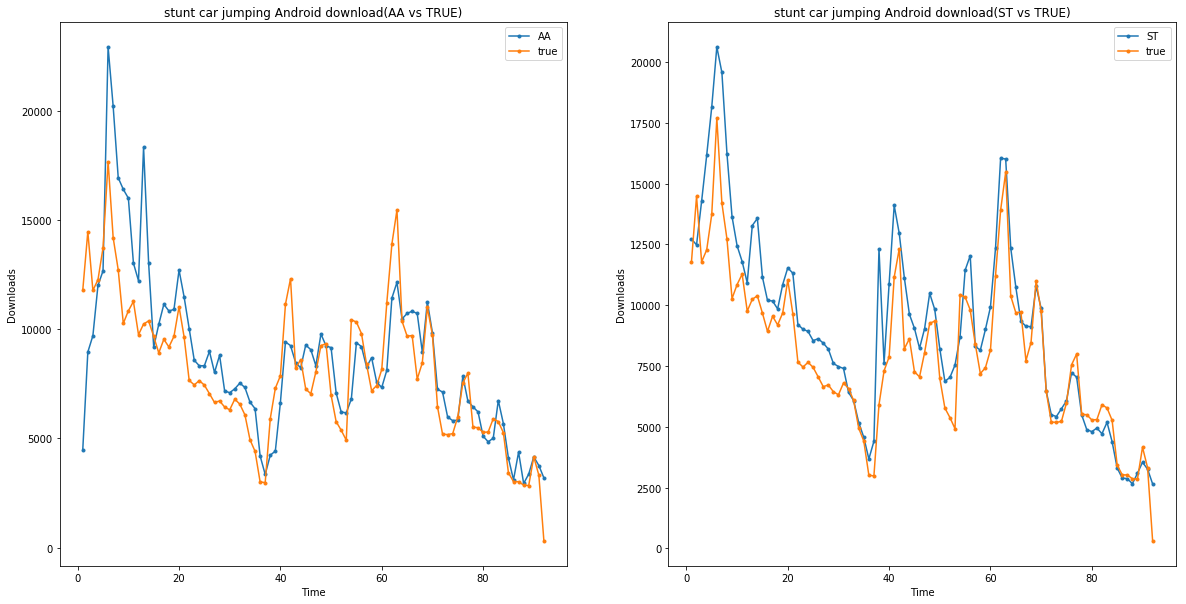

  A-Name          MAE      MAPE           MSE         RMSE
0     ST  1312.423913  0.242487  3.146091e+06  1773.722330
1     AA  1617.043478  0.293869  5.250690e+06  2291.438494


In [24]:
scj_st = requests_Download_RevenueEstimates('android', 'US', 'daily', '2020-11-30', '2021-3-1', 'www.stunt.stuntcarjumping')
scj_true = pd.read_excel('jetcar3d-an.xlsx')
scj_st['true'] = scj_true['下载量']
SCJ_AA = pd.read_excel('Android_SCJ_AA.xlsx')
scj_st['AA'] = SCJ_AA['Download']
scj_st['count'] = [i for i in range(1, len(scj_st['u']) + 1)]

# subplot(numRows, numCols, plotNum)
# 
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(scj_st['count'], scj_st['AA'], '.-', label='AA')
plt.plot(scj_st['count'], scj_st['true'], '.-', label='true')
plt.title('stunt car jumping Android download(AA vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()

plt.subplot(122)
plt.plot(scj_st['count'], scj_st['u'], '.-', label='ST')
plt.plot(scj_st['count'], scj_st['true'], '.-', label='true')
plt.title('stunt car jumping Android download(ST vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()
plt.show() # 显示图形

print(compare(scj_st['true'], scj_st['u'], scj_st['AA']))

In [25]:
scj_st

,aid,c,d,u,true,AA,count
0,www.stunt.stuntcarjumping,US,2020-11-30T00:00:00Z,12722,11795,4476,1
1,www.stunt.stuntcarjumping,US,2020-12-01T00:00:00Z,12485,14479,8961,2
2,www.stunt.stuntcarjumping,US,2020-12-02T00:00:00Z,14281,11787,9712,3
3,www.stunt.stuntcarjumping,US,2020-12-03T00:00:00Z,16169,12276,12014,4
4,www.stunt.stuntcarjumping,US,2020-12-04T00:00:00Z,18160,13739,12683,5
5,www.stunt.stuntcarjumping,US,2020-12-05T00:00:00Z,20628,17693,22948,6
6,www.stunt.stuntcarjumping,US,2020-12-06T00:00:00Z,19576,14203,20224,7
7,www.stunt.stuntcarjumping,US,2020-12-07T00:00:00Z,16241,12725,16949,8
8,www.stunt.stuntcarjumping,US,2020-12-08T00:00:00Z,13648,10274,16419,9
9,www.stunt.stuntcarjumping,US,2020-12-09T00:00:00Z,12447,10851,16014,10


In [26]:
jc_st = requests_Download_RevenueEstimates('ios', 'US', 'daily', '2020-11-30', '2021-3-1', '1519399656')
jc_st['u'] = jc_st['au'] + jc_st['iu']

jc_true = pd.read_excel('jetcar3d-ios.xlsx')
jc_st['true'] = jc_true['下载量']

JC_AA = pd.read_excel('iOS_JC_AA.xlsx')
jc_st['AA'] = jc_AA['Download']
jc_st['count'] = [i for i in range(1, len(jc_st['u']) + 1)]

# subplot(numRows, numCols, plotNum)
# 
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(jc_st['count'], jc_st['AA'], '.-', label='AA')
plt.plot(jc_st['count'], jc_st['true'], '.-', label='true')
plt.title('Jet Car 3D ios download(AA vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()

plt.subplot(122)
plt.plot(jc_st['count'], jc_st['u'], '.-', label='ST')
plt.plot(jc_st['count'], jc_st['true'], '.-', label='true')
plt.title('Jet Car 3D ios download(ST vs TRUE)')
plt.xlabel('Time')
plt.ylabel('Downloads')
plt.legend()
plt.show() # 显示图形

print(compare(jc_st['true'], jc_st['u'], jc_st['AA']))

200


NameError: name 'jc_AA' is not defined

In [29]:
test_tashuju = requests_Download_RevenueEstimates('ios', 'US', 'daily', '2020-9-12', '2021-3-1', '1531465966')

200


In [30]:
test_tashuju

,aid,au,cc,d,iu
0,1531465966,NaN,US,2020-09-17T00:00:00Z,56
1,1531465966,21.0,US,2020-09-18T00:00:00Z,276
2,1531465966,NaN,US,2020-09-19T00:00:00Z,354
3,1531465966,NaN,US,2020-09-20T00:00:00Z,440
4,1531465966,51.0,US,2020-09-21T00:00:00Z,920
5,1531465966,70.0,US,2020-09-22T00:00:00Z,1456
6,1531465966,77.0,US,2020-09-23T00:00:00Z,1579
7,1531465966,77.0,US,2020-09-24T00:00:00Z,2660
8,1531465966,67.0,US,2020-09-25T00:00:00Z,3665
9,1531465966,86.0,US,2020-09-26T00:00:00Z,3682
